In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from IPython.display import display, Image
sns.set()
%matplotlib inline

# Neural Network

**How does an artificial neural network look like**?

In [2]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Neural_network_example.svg/220px-Neural_network_example.svg.png')

**What can neural networks do?**

Can do both classification and regression. Examples include images classification, self-driving, AlphaGo, Tiktok video recommendation algorithm. 

**Why is the neural network considered as a more advanced method than KNN?**

Neural networks combines many different ideas: linear and nonlinear regression, ensemble methods (another example is a more advanced type of tree - random forest), etc. The input features often live in a higher-dimensional space. -- at the core of deep learning.

### Perceptrons

- One of the simplest neural network architectures
- Developed by Frank Rosenblatt in 1957.
- Supervised learning method of binary classifiers (output is binary).

See wikipedia page for more information about perceptrons: https://en.wikipedia.org/wiki/Perceptron

In [3]:
Image(url = 'https://upload.wikimedia.org/wikipedia/en/thumb/5/52/Mark_I_perceptron.jpeg/220px-Mark_I_perceptron.jpeg')

**How does a perceptron work?**

Recall the multilinear regression: $ y = b + \Sigma w_i x_i $. 

If $ y \ge 0 $, output 1. Otherwise ($ y \lt 0 $) output 0. Such behavior is called step functions in mathematics.

we rename:

- $b$ : bias
- $w_i$ : weight of feature $x_i$



In [4]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Ncell.png/300px-Ncell.png')

A perceptron is similar to a linear SVM.

**Use perceptron to classify gas and solid in the periodic table**

In [5]:
Elements = pd.read_csv('https://gist.githubusercontent.com/GoodmanSciences/c2dd862cd38f21b0ad36b8f96b4bf1ee/raw/1d92663004489a5b6926e944c1b3d9ec5c40900e/Periodic%2520Table%2520of%2520Elements.csv')
# Since a perceptron is a binary classifier, we drop the artificial elements and liquid phase elements.
Elements_sg = Elements.loc[(Elements['Phase'] != 'artificial') & (Elements['Phase'] != 'liq')]
Elements_sg_new = Elements_sg.drop([1])

In [6]:
from sklearn.linear_model import Perceptron

clf = Perceptron() # we use default despite of that there are lots of hyperparameters in Perceptron()

# do we need class_weight = 'balanced'?

clf.fit(Elements_sg_new[["MeltingPoint", "BoilingPoint"]].values, Elements_sg_new['Phase'])

print("weights:", clf.coef_) # weight1, weight2
print("bias:", clf.intercept_) # bias

weights: [[1402.169 3595.58 ]]
bias: [-110.]


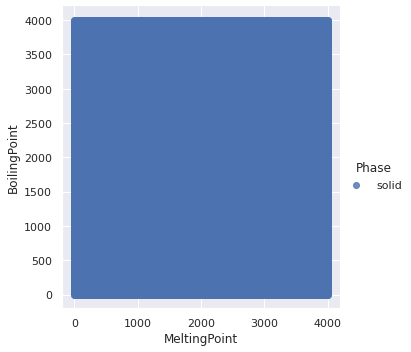

In [8]:
# array of melting point 
x_m = np.linspace(1, 4000, 401)
# array of boiling point
x_b = np.linspace(1, 4000, 401)
# Get 2D mesh of x_m and x_b
xx_1, xx_2 = np.meshgrid(x_m, x_b)
# flatten the 2D array to plot decision boundary
xx = np.concatenate((xx_1.ravel().reshape(-1,1), xx_2.ravel().reshape(-1,1)), axis=1)
# predict
y = clf.predict(xx)
# plot the result
Elements_predict = pd.DataFrame(data=np.concatenate((xx, y.reshape(-1,1)), axis=1), columns=["MeltingPoint", "BoilingPoint", "Phase"])
# convert string data to float data (There are lots of string data in DataFrame)
Elements_predict['MeltingPoint'] = Elements_predict['MeltingPoint'].astype(float)
Elements_predict['BoilingPoint'] = Elements_predict['BoilingPoint'].astype(float)
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_predict, fit_reg = False);

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(clf.predict(Elements_sg_new[["MeltingPoint", "BoilingPoint"]].values), Elements_sg_new['Phase'])

0.8850574712643678

**Normalization**

Rescaling the data to small values (in general, input values to a neural network should be close to zero -- typically we expect either data with zero-mean and unit-variance, or data in the [0, 1] range. Normalization is necessary for neural network applications. 

In [10]:
Elements_sg_new[['MeltingPoint', 'BoilingPoint']]

,MeltingPoint,BoilingPoint
0,14.175,20.28
2,453.850,1615.00
3,1560.150,2742.00
4,2573.150,4200.00
5,3948.150,4300.00
...,...,...
87,973.150,2010.00
88,1323.150,3471.00
89,2028.150,5061.00
90,1873.150,4300.00


In [11]:
X # being normalized

array([[-1.37998494, -1.59113732],
       [-0.90623145, -0.58285218],
       [ 0.28581605,  0.12971012],
       [ 1.37733203,  1.05155203],
       [ 2.85890603,  1.11477849],
       [-1.32706312, -1.55504765],
       [-1.34084445, -1.54692937],
       [-1.33747185, -1.55019818],
       [-1.36864093, -1.58684424],
       [-0.99534139, -0.87306167],
       [-0.40055677, -0.74218288],
       [-0.38951231,  0.16132335],
       [ 0.41834958,  0.63299281],
       [-1.05341909, -1.25431728],
       [-0.97663585, -1.15012006],
       [-1.20959316, -1.45277884],
       [-1.30479102, -1.54876294],
       [-1.03267706, -0.95146249],
       [-0.19690769, -0.4930706 ],
       [ 0.55734816,  0.36175126],
       [ 0.68772668,  0.64690263],
       [ 0.9484837 ,  0.72277439],
       [ 0.89999582,  0.25742758],
       [ 0.24163821, -0.12825387],
       [ 0.55303813,  0.37755787],
       [ 0.50993779,  0.41928734],
       [ 0.46468244,  0.41043564],
       [ 0.06772836,  0.18851073],
       [-0.64867463,

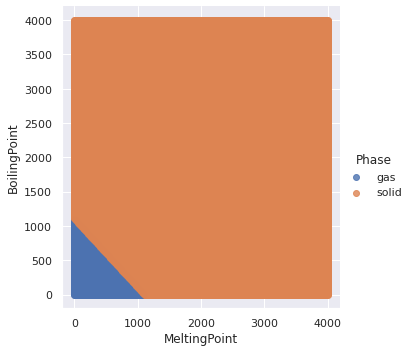

In [9]:
from sklearn.preprocessing import StandardScaler  # Normalization (StandardScalar)

# do we need class_weight = 'balanced'?

sc = StandardScaler()
sc.fit(Elements_sg_new[["MeltingPoint", "BoilingPoint"]])
# feature X will be normalized from the raw data.
X = sc.transform(Elements_sg_new[["MeltingPoint", "BoilingPoint"]])

# using the normalized data to fit
clf.fit(X, Elements_sg_new['Phase'])

sc.fit(xx)
xx_std = sc.transform(xx)
# predict
y = clf.predict(xx_std)
# plot the result
Elements_predict = pd.DataFrame(data=np.concatenate((xx, y.reshape(-1,1)), axis=1), columns=["MeltingPoint", "BoilingPoint", "Phase"])
Elements_predict['MeltingPoint'] = Elements_predict['MeltingPoint'].astype(float)
Elements_predict['BoilingPoint'] = Elements_predict['BoilingPoint'].astype(float)
sns.lmplot(x = "MeltingPoint", y = "BoilingPoint", hue="Phase", data = Elements_predict, fit_reg = False);

**Biological analog**

In [12]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/4/44/Neuron3.png')

**Limitation**

A single perceptron fails in the XOR problem.


XOR truth table

| Input x1 | Input x2 | Output |
|----------|----------|--------|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|


### Multi-Layer Perceptrons (MLPs) 

Welcome to the real world! Biological analog:

In [13]:
Image(url = 'https://upload.wikimedia.org/wikipedia/commons/b/be/Forest_of_synthetic_pyramidal_dendrites_grown_using_Cajal%27s_laws_of_neuronal_branching.png')

**Structure of a MLP**

In [14]:
Image(url = 'https://upload.wikimedia.org/wikipedia/en/5/54/Feed_forward_neural_net.gif')

Some terminology:

- MLP belongs to the class of **feedforward neural networks**
- **backpropagation** is a widely used algorithm in training feedforward neural networks: it find out how each connection weight and each bias term should be tweaked in order to reduce the error.

Details of training in handson, summary:

for each training instance the backpropagation algorithm first makes a prediction (forward propagation), measures the error (MSE, cross-entropy, etc.), then goes through each layer in reverse to measure the error contribution from each connection (backward propagation), and finally slightly tweaks the connection weights to reduce the error (using gradient descent for example). These steps are usually automatically taken care of in Keras.

Ref: Hands-On Machine Learning with Scikit-Learn and TensorFlow

When an artificial neural network contains a deep stack of hidden layers, it is called a **deep neural network**.

### Activation function

Simple perception uses the step function as the activation function, i.e., if $ y \ge 0 $, output 1. Otherwise ($ y \lt 0 $) output 0. This behavior is not smooth and is usually not optimal for using and traning the neural network.

Alternatives:

- The logistic function: $f(y) = \sigma (y) = \frac{1}{1\ –\ e^{-y}}$
- The hyperbolic tangent function: $f(y) = tanh(y) = 2\sigma(2y) – 1$
- The rectified linear unit function: $ f(y) = ReLU(y) = max(0, y) $
- Softmax: $f_i(x) = \frac{e^{x_i}}{\Sigma_{j=1}^n e^{x_j}} $
- ...

Wikipedia has a list of activation functions: https://en.wikipedia.org/wiki/Activation_function. A problem could favor one activition function over another. NN is a very fexible method that different layers can use different activation function.

The nonlinear behaivor of activiation function is the fudemental origin that neural network is a nonlinear method.